In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)

# %cd /content/drive/MyDrive/Colab\ Notebooks/GitHub/

# Set current working project repo
# repository = 'AmazonReview_UsefulnessRanker'
# %cd {repository}

# Data Challenge Presentation

## Agenda
- [Problem Statement](#problem-statement)
- [Project Structure](#project-structure)
  - [Pre-processing](#pre-processing)
  - [Embedding Step](#embedding-step)
  - [Modelling](#modelling)
    - [Logistic Regression](#logistic-regression)
      - [Metric Choice](#metric-choice)
      - [Evaluation Process](#evaluation-process)
      - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [XGBoost](#xgboost)
      - [Model Choice](#model-choice)
      - [Evaluation Process](#evaluation-process-1)
      - [Metric Selection](#metric-selection)
- [Conclusion](#conclusion)
- [Brainstorming/Improvements](#brainstorming)

## Problem Statement
<a id="problem-statement"></a>

### Pre-processing Steps
- **Steps**:

### Imbalance Target: Sampling Techniques
<a id="imbalance-target"></a>
- **Steps**:

### Embedding Step
<a id="embedding-step"></a>
- **Steps**:

### Modelling
<a id="modelling"></a>

#### Logistic Regression
<a id="logistic-regression"></a>
##### Metric Choice
<a id="metric-choice"></a>
- **Steps**:

##### Evaluation Process
<a id="evaluation-process"></a>
- **Steps**:

#### XGBoost
<a id="xgboost"></a>
##### Model Choice
<a id="model-choice"></a>
- **Steps**:

##### Evaluation Process
<a id="evaluation-process"></a>
- **Steps**:

##### Metric Selection
<a id="metric-selection"></a>
- **Steps**:

##### Hyperparameter Tuning
<a id="hyperparameter-tuning"></a>
- **Steps**:

## Conclusion
<a id="conclusion"></a>

## Prompt Optimization
<a id="prompt-optimization"></a>



#**Problem Statement:**

## Overview

## Instructions
The Amazon Book Reviews Dataset is a collection of customer reviews for books sold on Amazon. This dataset is part of the broader Amazon Customer Reviews Dataset, which includes reviews for a variety of product categories.The Book dataset offers insights into customer opinions, ratings, and experiences with books, making it a valuable resource for research in natural language processing (NLP), sentiment analysis, and recommendation systems.

## Data:
* Download the Amazon Book Reviews Dataset from [Kaggle](https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset?select=amazon_reviews_us_Books_v1_02.tsv).
* Note: you do not need to download the full dataset - just the books subset:
* Filter the dataset for the last two years of reviews available (2003-2005).

### Data Dictionary:
* **marketplace:** A two-letter country code representing the marketplace where the review was written.
* **customer_id:** A random identifier for the customer.
* **review_id:** The unique identifier for each review.
* **product_id:** The unique identifier for the product being reviewed.
* **product_parent:** A random identifier that can be used to aggregate reviews for the same product.
* **product_title:** The title of the product.
* **product_category:** The broad category under which the product falls.
* **star_rating:** The star rating given by the reviewer, ranging from 1 to 5 stars.
* **helpful_votes:** The number of votes indicating how many customers found
the review helpful.
* **total_votes:** The total number of votes the review received.
* **vine:** Indicates whether the review was written as part of the Vine program, where selected reviewers receive free products for review.
* **verified_purchase:** Indicates whether the review is based on a verified purchase.
* **review_headline:** The title or headline of the review.
* **review_body:** The main text of the review.
* **review_date:** The date on which the review was written.

## Background to Task
* You are responsible for optimising the display of information on an e-commerce website selling books.
* This website contains descriptions of books and a section on each book page for users to leave reviews of books they have previously read. You have been asked to create a model that will optimise the display of reviews so that reviews which are most likely to be helpful are surfaced first to users while reviews that are less likely to be helpful are less likely to be displayed.

## Outline of Objectives
* Carry out EDA of the dataset and report on your findings - this may be inline in a notebook based tool

* Create a model that predicts the likelihood of a review being helpful (you may, for example, take the ‘helpfulness’ as the ratio of helpful_votes to total_votes)

* Evaluate this model and report on your findings

In [2]:
# import tensorflow as tf
# print("GPU Available:", tf.config.list_physical_devices('GPU'))


In [3]:
# !pip install sentence-transformers
# from sentence_transformers import SentenceTransformer
# !pip install joblib

In [4]:
# import nltk

# Download necessary NLTK datasets
# nltk.download('stopwords')
# nltk.download('wordnet')

In [5]:
# Import libraries

import re
import time
import zipfile
import pandas as pd
import numpy as np

from tqdm import tqdm
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data files
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK data files
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from multiprocessing import Pool, cpu_count
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support, roc_curve, auc

import xgboost as xgb
from imblearn.pipeline import Pipeline

import joblib
from joblib import dump, load
# Assuming grid_search is your GridSearchCV instance

import warnings

# Suppress all warnings

## Load Data

In [6]:
# setting random seed
seed = 42
np.random.seed(seed)

In [7]:
# loading data

# Specify the path to your zip file
# zip_file_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub/AmazonReview_UsefulnessRanker/data/amazon_reviews_us_Books_v1_02.tsv.zip"

# Use pandas to read the data directly from the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Assuming the zip file contains a single TSV file named amazon_reviews_us_Books_v1_02.tsv
#     with z.open('amazon_reviews_us_Books_v1_02.tsv') as f:
        # Read the TSV file directly from the zip archive
#         df = pd.read_csv(f, sep='\t', on_bad_lines="skip")

# Display the first few rows of the DataFrame
#df.head()


In [8]:
# Convert 'review_date' to datetime format if it's in string format
# df['review_date'] = pd.to_datetime(df['review_date'])

# Define the start and end dates for your filter (2003-01-01 to 2005-12-31)
# start_date = pd.to_datetime('2003-01-01')
# end_date = pd.to_datetime('2005-12-31')

# Apply the filter to select rows within the date range
# book_df = df.loc[(df['review_date'] >= start_date) & (df['review_date'] <= end_date), :].copy()

# Optionally, you can reset the index if needed
# book_df.reset_index(drop=True, inplace=True)

# Save filtered data into csv

# Save the filtered DataFrame to a CSV file
# book_df.to_parquet('data/filtered_amazon_reviews.parquet', index=False)

In [9]:
# Loading filtered data

#file_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub/AmazonReview_UsefulnessRanker/data/filtered_amazon_reviews.parquet"
kaggle_file_path = '/kaggle/input/amazonreview-usefulnessdata/filtered_amazon_reviews.parquet'
book_df = pd.read_parquet(kaggle_file_path)

In [10]:
print(book_df.shape)
book_df.head()

(1286157, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [11]:
# Look at shape of data
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286157 entries, 0 to 1286156
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   marketplace        1286157 non-null  object 
 1   customer_id        1286157 non-null  int64  
 2   review_id          1286157 non-null  object 
 3   product_id         1286157 non-null  object 
 4   product_parent     1286157 non-null  int64  
 5   product_title      1286157 non-null  object 
 6   product_category   1286157 non-null  object 
 7   star_rating        1286157 non-null  float64
 8   helpful_votes      1286157 non-null  float64
 9   total_votes        1286157 non-null  float64
 10  vine               1286157 non-null  object 
 11  verified_purchase  1286157 non-null  object 
 12  review_headline    1286122 non-null  object 
 13  review_body        1286157 non-null  object 
 14  review_date        1286157 non-null  object 
dtypes: float64(3), int64(2), object(

## Data Preprocessing

### Target Variable Creation

In [12]:
# Missing value Treatment
book_df.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      35
review_body           0
review_date           0
dtype: int64

In [13]:
book_df.review_headline.fillna('', inplace=True)

/tmp/ipykernel_33/14003764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_df.review_headline.fillna('', inplace=True)


In [14]:
# Check for NaN values
print("Checking for NaN values:")
print(book_df.isnull().sum())

Checking for NaN values:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64


In [15]:
# Check for NaN values
print("Checking for NaN values in helpful_votes and total_votes:")
print(book_df[['helpful_votes', 'total_votes']].isnull().sum())


Checking for NaN values in helpful_votes and total_votes:
helpful_votes    0
total_votes      0
dtype: int64


In [16]:
# Ensure total_votes is not zero to avoid division by zero
book_df[book_df['total_votes'] < 0].sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating          0.0
helpful_votes        0.0
total_votes          0.0
vine                   0
verified_purchase      0
review_headline        0
review_body            0
review_date            0
dtype: object

In [17]:
# Ensure total_votes is not zero to avoid division by zero
book_df[book_df['helpful_votes'] < 0].sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating          0.0
helpful_votes        0.0
total_votes          0.0
vine                   0
verified_purchase      0
review_headline        0
review_body            0
review_date            0
dtype: object

In [18]:
print("Checking for zero values in total_votes:")
print((book_df['total_votes'] == 0).sum())


Checking for zero values in total_votes:
111288


In [19]:
# Ensure total_votes is not zero to avoid division by zero
# Create a copy to avoid setting on a slice
book_df = book_df[book_df['total_votes'] > 0].copy()

# Calculate helpfulness ratio
book_df['helpfulness_ratio'] = book_df['helpful_votes'] / book_df['total_votes']

In [20]:
# Check for NaN values
print("Checking for NaN values:")
print(book_df.isnull().sum())

Checking for NaN values:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
helpfulness_ratio    0
dtype: int64


Descriptive Statistics of Helpfulness Ratio:
count    1174869.000
mean           0.741
std            0.290
min            0.000
25%            0.562
50%            0.833
75%            1.000
max            1.000
Name: helpfulness_ratio, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


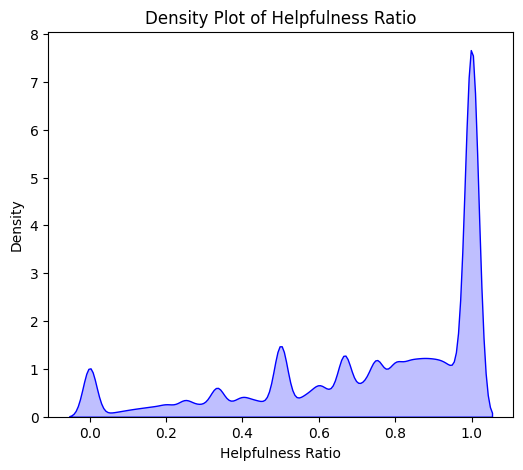

In [21]:
# Compute descriptive statistics
stats = book_df['helpfulness_ratio'].describe()

# Format the statistics
formatted_stats = stats.apply(lambda x: round(x, 3))  # Round to 3 decimal places

# Print formatted statistics
print("Descriptive Statistics of Helpfulness Ratio:")
print(formatted_stats)

# Kernel Density Plot
plt.figure(figsize=(6, 5))
sns.kdeplot(book_df['helpfulness_ratio'], fill=True, color='blue')
plt.title('Density Plot of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Density')
plt.show()

In [22]:
# Check for NaN values
print("Checking for NaN values:")
print(book_df.isnull().sum())

Checking for NaN values:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
helpfulness_ratio    0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


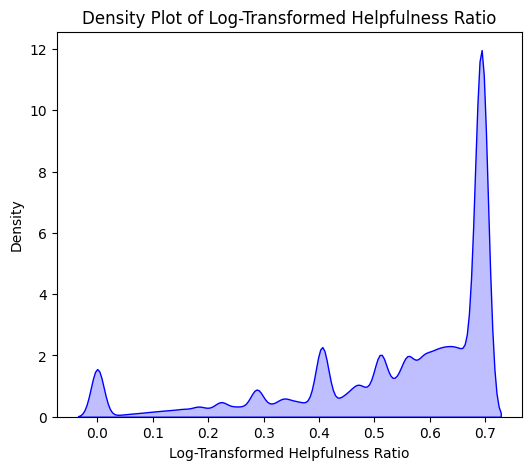

Descriptive Statistics of Helpfulness Ratio:
count    1174869.000
mean           0.538
std            0.189
min            0.000
25%            0.446
50%            0.606
75%            0.693
max            0.693
Name: log_helpfulness_ratio, dtype: float64


In [23]:
# Apply log transformation (log1p) to handle skewness
book_df['log_helpfulness_ratio'] = np.log1p(book_df['helpfulness_ratio'])

# Drop the original helpfulness_ratio column
book_df.drop(columns=['helpfulness_ratio'], inplace=True)

# Compute descriptive statistics
stats = book_df['log_helpfulness_ratio'].describe()

# Kernel Density Plot of log_helpfulness_ratio
plt.figure(figsize=(6, 5))
sns.kdeplot(book_df['log_helpfulness_ratio'], fill=True, color='blue')
plt.title('Density Plot of Log-Transformed Helpfulness Ratio')
plt.xlabel('Log-Transformed Helpfulness Ratio')
plt.ylabel('Density')
plt.show()

# Compute descriptive statistics
stats = book_df['log_helpfulness_ratio'].describe()

# Format the statistics
formatted_stats = stats.apply(lambda x: round(x, 3))  # Round to 3 decimal places

# Print formatted statistics
print("Descriptive Statistics of Helpfulness Ratio:")
print(formatted_stats)

In [24]:
book_df.isnull().sum()

marketplace              0
customer_id              0
review_id                0
product_id               0
product_parent           0
product_title            0
product_category         0
star_rating              0
helpful_votes            0
total_votes              0
vine                     0
verified_purchase        0
review_headline          0
review_body              0
review_date              0
log_helpfulness_ratio    0
dtype: int64

**Observation:**


*   **Target Variable:**
  * **Current:** Noticed slight right-skewness in the distribution of helpfulness ratio. Which implies higher helpfulness ratios than lower ones, but this is expected considering the nature of how users see only few reviews.
  * **Proposed:** Applying log transformation to reduce the skewness slightly   



Anchor: point of normalizing votes?

Or clean data first and then truncate which sounds like good order

Combine headline and body
decide whether to truncate first and then combine

In [25]:
# Check Unique values
book_df.nunique()

marketplace                    1
customer_id               592666
review_id                1174869
product_id                378326
product_parent            336626
product_title             355072
product_category               1
star_rating                    5
helpful_votes                790
total_votes                  870
vine                           2
verified_purchase              2
review_headline           967821
review_body              1167335
review_date                 1018
log_helpfulness_ratio       9219
dtype: int64

In [26]:
book_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,log_helpfulness_ratio
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14,0.510826
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14,0.693147
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14,0.044452
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14,0.693147
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14,0.000000


### EDA

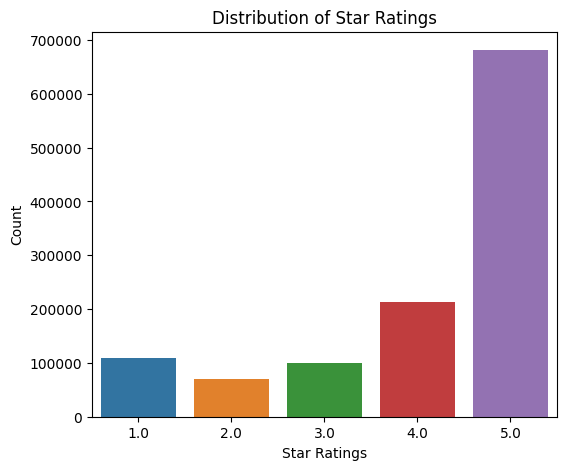

In [27]:
# General function to generate histogram
def count_plot(attribute, label):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=book_df, x=attribute)
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.title(f'Distribution of {label}')
    plt.show()

count_plot('star_rating', 'Star Ratings')

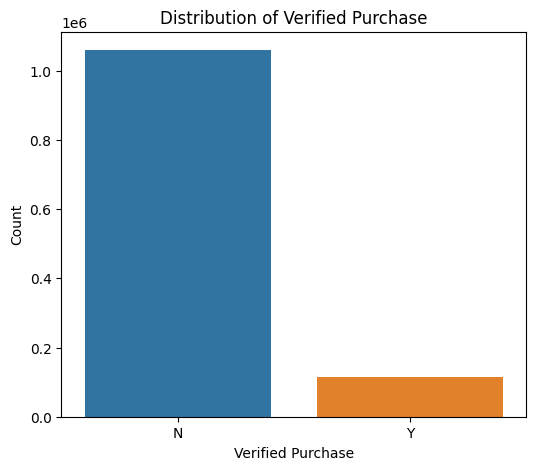

In [28]:
# Count plot of verified purchases
count_plot('verified_purchase', 'Verified Purchase')

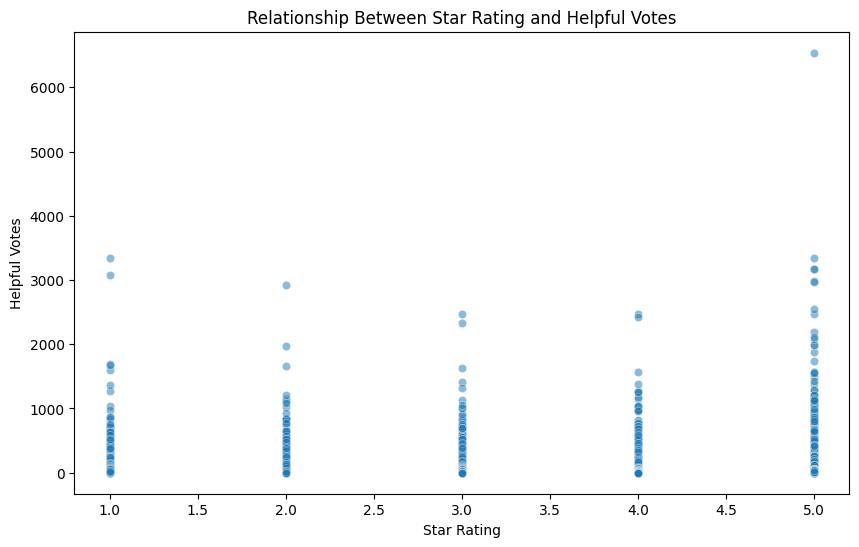

In [29]:
# Scatter plot of star rating vs helpful votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='star_rating', y='helpful_votes', data=book_df, alpha=0.5)
plt.title('Relationship Between Star Rating and Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.show()

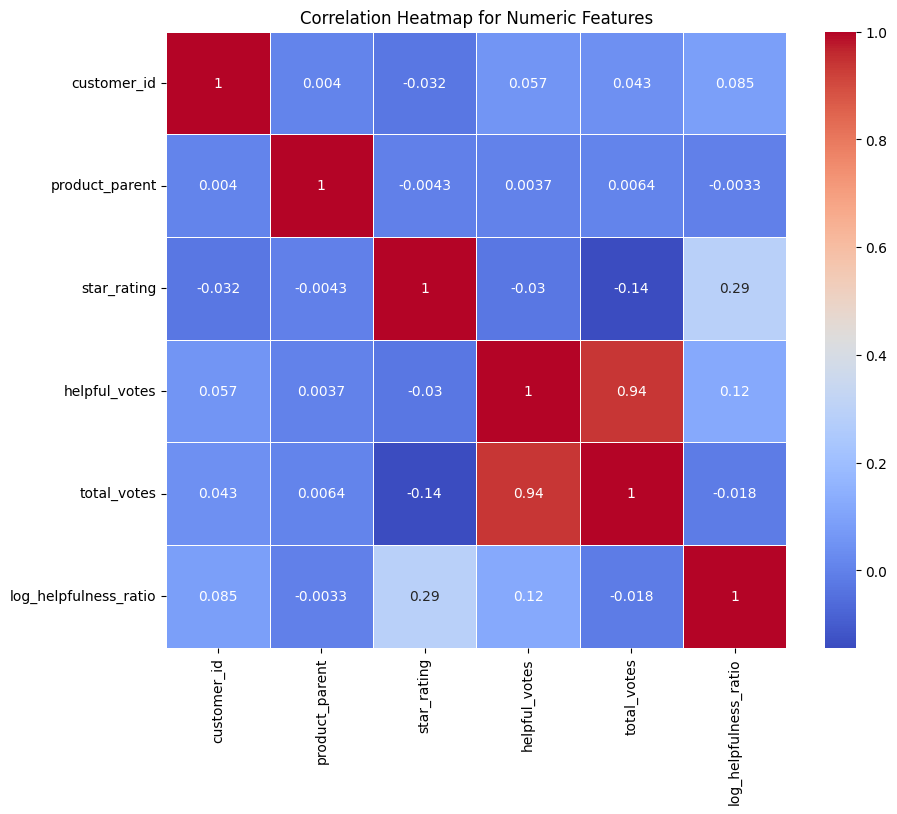

In [30]:
# List of columns to exclude from correlation calculation
non_numeric_columns = ['marketplace', 'review_id', 'product_id', 'product_title',
                       'product_category', 'vine', 'verified_purchase', 'review_headline']

# Select only numeric columns
numeric_columns = book_df.select_dtypes(include=['number']).columns.tolist()

# Exclude non-numeric columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Compute correlation matrix for numeric columns only
numeric_corr_matrix = book_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()


In [31]:
# drop columns
cols_drop = ['marketplace', 'customer_id', 'review_id', 'product_category',
             'vine', 'helpful_votes', 'total_votes']
book_df = book_df.drop(cols_drop, axis=1).reset_index()

In [32]:
book_df.head()

,index,product_id,product_parent,product_title,star_rating,verified_purchase,review_headline,review_body,review_date,log_helpfulness_ratio
0,0,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),4.0,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14,0.510826
1,1,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,3.0,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14,0.693147
2,2,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",4.0,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14,0.044452
3,3,0373836635,348672532,Colby Conspiracy (Colby Agency),5.0,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14,0.693147
4,4,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,4.0,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14,0.000000


**Anchor:**
- Atleast 3 helpful votes - deicide to use or no ;removes spam messages

**Anchor Observation:**
  *   Usefulness already records the product level because this is a ratio of total votes at product level, using just review column

*   **In conclusion:** Ranking at the end at each product level

### Truncate reviews

In [33]:
# Extract metadata columns
metadata_df = book_df[['product_id', 'product_parent', 'product_title', 'star_rating', 'verified_purchase', 'review_date']].copy()

# Extract columns for analysis
review_df = book_df[['product_id', 'review_headline', 'review_body', 'log_helpfulness_ratio']].copy()

# Optionally, reset the index for both DataFrames if needed
metadata_df.reset_index(drop=True, inplace=True)
review_df.reset_index(drop=True, inplace=True)

# Display first few rows of each DataFrame to verify
# print("Metadata DataFrame:")
# print(metadata_df.head())

# print("\n DataFrame:")
# print(review_df.head())

del book_df
# del metadata_df

In [34]:
review_df.isnull().sum()

product_id               0
review_headline          0
review_body              0
log_helpfulness_ratio    0
dtype: int64

In [35]:
# Function to calculate number of words
def count_words(text):
    return len(text.split())

def count_matplot(df, column_name, bins):
  # Calculate histogram
    counts, bin_edges = np.histogram(df[column_name], bins=bins)

    # Print the counts and corresponding bin edges
    for i in range(len(counts)):
        print(f'Bin range: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}, Count: {counts[i]}')

    # Plot the histogram
    plt.figure(figsize=(6, 5))
    plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Word Counts in {column_name}')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Bin range: 0.00 - 1.00, Count: 32
Bin range: 1.00 - 2.00, Count: 70028
Bin range: 2.00 - 3.00, Count: 150114
Bin range: 3.00 - 4.00, Count: 191134
Bin range: 4.00 - 5.00, Count: 176310
Bin range: 5.00 - 6.00, Count: 153796
Bin range: 6.00 - 7.00, Count: 131017
Bin range: 7.00 - 8.00, Count: 104181
Bin range: 8.00 - 9.00, Count: 77482
Bin range: 9.00 - 10.00, Count: 54091
Bin range: 10.00 - 11.00, Count: 33649
Bin range: 11.00 - 12.00, Count: 18099
Bin range: 12.00 - 13.00, Count: 8406
Bin range: 13.00 - 14.00, Count: 3439
Bin range: 14.00 - 15.00, Count: 1339
Bin range: 15.00 - 16.00, Count: 625
Bin range: 16.00 - 17.00, Count: 366
Bin range: 17.00 - 18.00, Count: 249
Bin range: 18.00 - 19.00, Count: 162
Bin range: 19.00 - 20.00, Count: 118
Bin range: 20.00 - 21.00, Count: 107
Bin range: 21.00 - 22.00, Count: 44
Bin range: 22.00 - 23.00, Count: 43
Bin range: 23.00 - 24.00, Count: 17
Bin range: 24.00 - 25.00, Count: 9
Bin range: 25.00 - 26.00, Count: 2
Bin range: 26.00 - 27.00, Count: 4

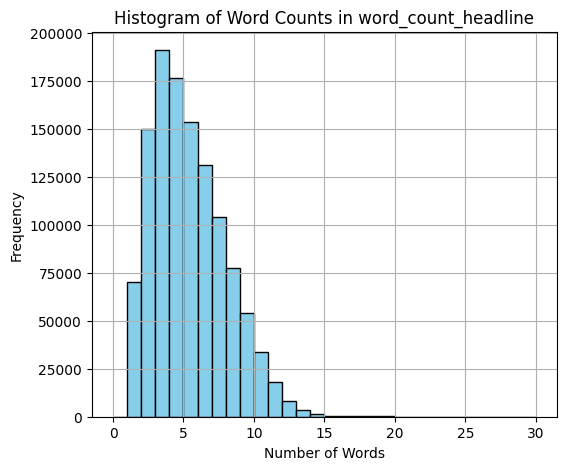

In [36]:
# Add new column for word count
review_df['word_count_headline'] = review_df['review_headline'].apply(count_words)

count_matplot(review_df, 'word_count_headline', 30)

Bin range: 1.00 - 215.58, Count: 868880
Bin range: 215.58 - 430.16, Count: 211140
Bin range: 430.16 - 644.74, Count: 51688
Bin range: 644.74 - 859.32, Count: 24628
Bin range: 859.32 - 1073.90, Count: 11979
Bin range: 1073.90 - 1288.48, Count: 3202
Bin range: 1288.48 - 1503.06, Count: 2002
Bin range: 1503.06 - 1717.64, Count: 514
Bin range: 1717.64 - 1932.22, Count: 339
Bin range: 1932.22 - 2146.80, Count: 158
Bin range: 2146.80 - 2361.38, Count: 79
Bin range: 2361.38 - 2575.96, Count: 69
Bin range: 2575.96 - 2790.54, Count: 54
Bin range: 2790.54 - 3005.12, Count: 27
Bin range: 3005.12 - 3219.70, Count: 21
Bin range: 3219.70 - 3434.28, Count: 18
Bin range: 3434.28 - 3648.86, Count: 4
Bin range: 3648.86 - 3863.44, Count: 11
Bin range: 3863.44 - 4078.02, Count: 9
Bin range: 4078.02 - 4292.60, Count: 8
Bin range: 4292.60 - 4507.18, Count: 2
Bin range: 4507.18 - 4721.76, Count: 4
Bin range: 4721.76 - 4936.34, Count: 5
Bin range: 4936.34 - 5150.92, Count: 4
Bin range: 5150.92 - 5365.50, Coun

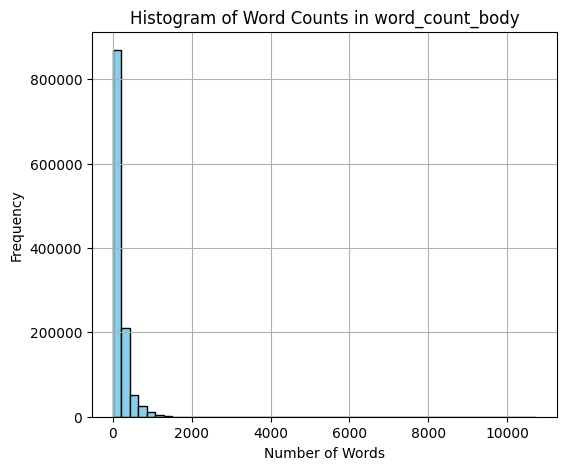

In [37]:
# Add new column for word count
review_df['word_count_body'] = review_df['review_body'].apply(count_words)

count_matplot(review_df, 'word_count_body', 50)

In [38]:
# Truncate review body to 1200
review_df = review_df[review_df.word_count_body <1200].reset_index()

# Print basic statistics for word counts
word_count_stats = review_df['word_count_body'].describe()
print(word_count_stats)

count    1.170204e+06
mean     1.771138e+02
std      1.708628e+02
min      1.000000e+00
25%      7.000000e+01
50%      1.220000e+02
75%      2.200000e+02
max      1.199000e+03
Name: word_count_body, dtype: float64


In [39]:
# Check for NaN values
print("Checking for NaN values:")
print(review_df.isnull().sum())

Checking for NaN values:
index                    0
product_id               0
review_headline          0
review_body              0
log_helpfulness_ratio    0
word_count_headline      0
word_count_body          0
dtype: int64


**Observation:**
* Anchor:
  *  Based on the observation, performing initial trunc at 1200 and testing

### Tokenization & Cleaning

In [40]:
def convert_to_lowercase(text):
    return text.lower()

# start_time = time.time()
# review_df['review_headline'] = review_df['review_headline'].apply(convert_to_lowercase)
# review_df['review_body'] = review_df['review_body'].apply(convert_to_lowercase)
# print("Time to convert to lowercase: {:.2f} seconds".format(time.time() - start_time))

def remove_html_tags(text):
    return re.sub(r'<[^>]*>', '', text)

# start_time = time.time()
# review_df['review_headline'] = review_df['review_headline'].apply(remove_html_tags)
# review_df['review_body'] = review_df['review_body'].apply(remove_html_tags)
# print("Time to remove HTML tags: {:.2f} seconds".format(time.time() - start_time))

def remove_unwanted_chars(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# start_time = time.time()
# review_df['review_headline'] = review_df['review_headline'].apply(remove_unwanted_chars)
# review_df['review_body'] = review_df['review_body'].apply(remove_unwanted_chars)
# print("Time to remove unwanted characters: {:.2f} seconds".format(time.time() - start_time))

def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# start_time = time.time()
# review_df['review_headline'] = review_df['review_headline'].apply(remove_urls)
# review_df['review_body'] = review_df['review_body'].apply(remove_urls)
# print("Time to remove URLs: {:.2f} seconds".format(time.time() - start_time))

def remove_email_addresses(text):
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

# start_time = time.time()
# review_df['review_headline'] = review_df['review_headline'].apply(remove_email_addresses)
# review_df['review_body'] = review_df['review_body'].apply(remove_email_addresses)
# print("Time to remove email addresses: {:.2f} seconds".format(time.time() - start_time))

# stop_words = set(stopwords.words('english'))

# start_time = time.time()

# Tokenize all reviews once
# tokenized_reviews = [word_tokenize(text) for text in review_df['review_headline']]

# Remove stop words
# reviews_no_stopwords = [[word for word in tokens if word.lower() not in stop_words] for tokens in tokenized_reviews]

# Join words back into sentences (if needed)
# cleaned_reviews = [' '.join(tokens) for tokens in reviews_no_stopwords]

# Replace original column with cleaned text
# review_df['review_headline'] = cleaned_reviews
# print("Time to tokenize and remove stopwords: {:.2f} seconds".format(time.time() - start_time))

def remove_stopwords(text):
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])

def apply_parallel(df):
    with Pool(cpu_count()) as pool:
        return list(tqdm(pool.imap(remove_stopwords, df), total=len(df)))

# start_time = time.time()
# Apply in parallel
# review_df['review_body'] = apply_parallel(review_df['review_body'])
# print("Time to tokenize and remove stopwords: {:.2f} seconds".format(time.time() - start_time))

# Initialize WordNetLemmatizer outside of the function for better multiprocessing performance
# lemmatizer = WordNetLemmatizer()

# Function to get WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # adjective
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun for lemmatization

# Function to lemmatize text with POS tagging
def lemmatize_with_pos_tagging(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized_words)

# Apply in parallel using multiprocessing
def apply_parallel(df_column):
    with Pool(cpu_count()) as pool:
        return list(tqdm(pool.imap(lemmatize_with_pos_tagging, df_column), total=len(df_column)))

# Applying lemmatization
# if __name__ == '__main__':

#    start_time = time.time()
#    review_df['review_headline'] = apply_parallel(review_df['review_headline'])
#    review_df['review_body'] = apply_parallel(review_df['review_body'])
#    print("Time to lemmatize with POS tagging using multiprocessing: {:.2f} seconds".format(time.time() - start_time))
#    print(review_df.head())  # Print the updated DataFrame to verify results

# Save review results to file
# review_df.to_parquet('data/review_df_cleaned.parquet', index=False)

In [41]:
# Loading cleaned review data

file_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub/AmazonReview_UsefulnessRanker/data/review_df_cleaned.parquet"
kagg_cleaned_file_path = "/kaggle/input/amazonreview-usefulnessdata/review_df_cleaned.parquet"
review_df = pd.read_parquet(kagg_cleaned_file_path)

# review_df = review_df.drop(['level_0', 'index', 'word_count_headline', 'word_count_body'], axis=1)

# review_df = review_df.reset_index()

In [42]:
# Fixing missed nans, Drop rows with NaN values in log_helpfulness_ratio
review_df.dropna(subset=['log_helpfulness_ratio'], inplace=True)

# Optional: Verify that the rows have been dropped
print("Checking for NaN values after dropping:")
print(review_df.isnull().sum())


Checking for NaN values after dropping:
level_0                  0
index                    0
product_id               0
review_headline          0
review_body              0
log_helpfulness_ratio    0
word_count_headline      0
word_count_body          0
dtype: int64


In [43]:
# Add new column for word count
review_df['word_count_headline'] = review_df['review_headline'].apply(count_words)

# Add new column for word count
review_df['word_count_body'] = review_df['review_body'].apply(count_words)

Bin range: 0.00 - 1.20, Count: 133813
Bin range: 1.20 - 2.40, Count: 343091
Bin range: 2.40 - 3.60, Count: 267067
Bin range: 3.60 - 4.80, Count: 211526
Bin range: 4.80 - 6.00, Count: 126284
Bin range: 6.00 - 7.20, Count: 81283
Bin range: 7.20 - 8.40, Count: 4796
Bin range: 8.40 - 9.60, Count: 1332
Bin range: 9.60 - 10.80, Count: 526
Bin range: 10.80 - 12.00, Count: 268
Bin range: 12.00 - 13.20, Count: 178
Bin range: 13.20 - 14.40, Count: 30
Bin range: 14.40 - 15.60, Count: 6
Bin range: 15.60 - 16.80, Count: 3
Bin range: 16.80 - 18.00, Count: 1


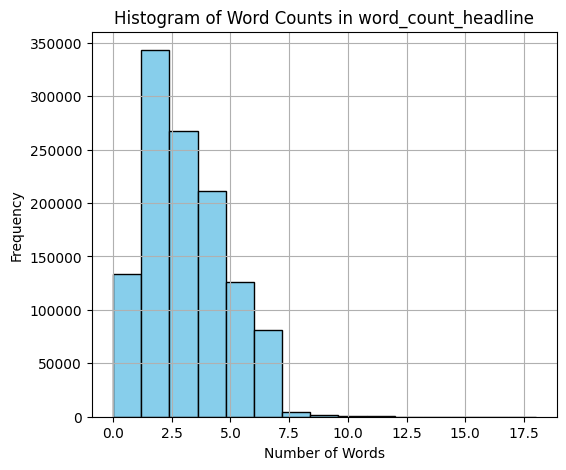

In [44]:
count_matplot(review_df, 'word_count_headline', 15)

Bin range: 0.00 - 20.10, Count: 115755
Bin range: 20.10 - 40.20, Count: 242706
Bin range: 40.20 - 60.30, Count: 216862
Bin range: 60.30 - 80.40, Count: 151610
Bin range: 80.40 - 100.50, Count: 105923
Bin range: 100.50 - 120.60, Count: 75968
Bin range: 120.60 - 140.70, Count: 57519
Bin range: 140.70 - 160.80, Count: 44492
Bin range: 160.80 - 180.90, Count: 31228
Bin range: 180.90 - 201.00, Count: 21243
Bin range: 201.00 - 221.10, Count: 17395
Bin range: 221.10 - 241.20, Count: 13360
Bin range: 241.20 - 261.30, Count: 10829
Bin range: 261.30 - 281.40, Count: 9288
Bin range: 281.40 - 301.50, Count: 7641
Bin range: 301.50 - 321.60, Count: 6539
Bin range: 321.60 - 341.70, Count: 5806
Bin range: 341.70 - 361.80, Count: 5370
Bin range: 361.80 - 381.90, Count: 4749
Bin range: 381.90 - 402.00, Count: 4336
Bin range: 402.00 - 422.10, Count: 4031
Bin range: 422.10 - 442.20, Count: 3331
Bin range: 442.20 - 462.30, Count: 2972
Bin range: 462.30 - 482.40, Count: 2587
Bin range: 482.40 - 502.50, Coun

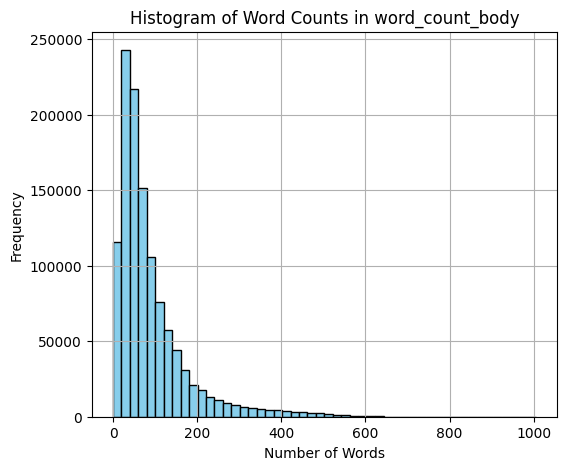

In [45]:
count_matplot(review_df, 'word_count_body', 50)

In [46]:
#
review_df.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,1170204.0,635595.413446,369281.181632,0.0,315918.750000,632238.500000,953641.250000,1.281406e+06
index,1170204.0,638526.715927,370668.034886,0.0,317715.750000,635588.500000,957789.250000,1.286156e+06
log_helpfulness_ratio,1170204.0,0.537643,0.189463,0.0,0.445739,0.606136,0.693147,6.931472e-01
word_count_headline,1170204.0,3.131216,1.517023,0.0,2.000000,3.000000,4.000000,1.800000e+01
word_count_body,1170204.0,90.308806,88.510924,0.0,35.000000,62.000000,112.000000,1.005000e+03


/tmp/ipykernel_33/2938560913.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count_combined'] = df['review_text'].apply(lambda x: len(x.split()))


Bin range: 20.00 - 25.60, Count: 61450
Bin range: 25.60 - 31.20, Count: 70571
Bin range: 31.20 - 36.80, Count: 61419
Bin range: 36.80 - 42.40, Count: 73174
Bin range: 42.40 - 48.00, Count: 59796
Bin range: 48.00 - 53.60, Count: 67710
Bin range: 53.60 - 59.20, Count: 61944
Bin range: 59.20 - 64.80, Count: 46589
Bin range: 64.80 - 70.40, Count: 50515
Bin range: 70.40 - 76.00, Count: 38044
Bin range: 76.00 - 81.60, Count: 41209
Bin range: 81.60 - 87.20, Count: 36902
Bin range: 87.20 - 92.80, Count: 28376
Bin range: 92.80 - 98.40, Count: 30501
Bin range: 98.40 - 104.00, Count: 23157
Bin range: 104.00 - 109.60, Count: 25472
Bin range: 109.60 - 115.20, Count: 22923
Bin range: 115.20 - 120.80, Count: 17755
Bin range: 120.80 - 126.40, Count: 19831
Bin range: 126.40 - 132.00, Count: 15179
Bin range: 132.00 - 137.60, Count: 16944
Bin range: 137.60 - 143.20, Count: 15806
Bin range: 143.20 - 148.80, Count: 12397
Bin range: 148.80 - 154.40, Count: 13767
Bin range: 154.40 - 160.00, Count: 10467
Bin 

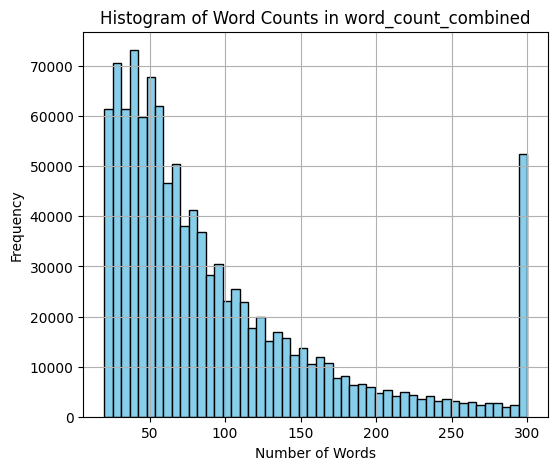

In [47]:
def truncate_and_clean(df, combined_cutoff=300, lower_cutoff=20):

    # Combine headline and body
    df['review_text'] = df['review_headline'] + ' ' + df['review_body']

    # Define the truncation function
    def truncate_text(text, cutoff):
        words = text.split()
        return ' '.join(words[:cutoff])

    # Apply truncation
    df['review_text'] = df['review_text'].apply(lambda x: truncate_text(x, combined_cutoff))

    # Filter out texts that are too short after cleaning
    df = df[df['review_text'].apply(lambda x: len(x.split()) >= lower_cutoff)]

    # Recalculate word counts after cleaning
    df['word_count_combined'] = df['review_text'].apply(lambda x: len(x.split()))

    return df

# Apply truncation, cleaning, and filtering
review_df = truncate_and_clean(review_df, combined_cutoff=300, lower_cutoff=20)

# Visualize the results
count_matplot(review_df, 'word_count_combined', 50)

In [48]:
review_df = review_df[['product_id', 'review_text', 'log_helpfulness_ratio']].copy()

# Save review results to file
# review_df.to_parquet('data/review_df_final.parquet', index=False)

In [49]:
# Loading cleaned review data

# file_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub/AmazonReview_UsefulnessRanker/data/review_df_final.parquet"
kagg_final_file_path = "/kaggle/input/amazonreview-usefulnessdata/review_df_final.parquet"
review_df = pd.read_parquet(kagg_final_file_path)

# Reset the index
review_df.reset_index(drop=True, inplace=True)

In [50]:
# Check for NaN values
print("Checking for NaN values:")
print(review_df.isnull().sum())

Checking for NaN values:
product_id               0
review_text              0
log_helpfulness_ratio    0
dtype: int64


**Achor observation:**

### Train Test Split

In [51]:
X = review_df['review_text']
y = review_df['log_helpfulness_ratio'].rename({'log_helpfulness_ratio': 'target'})

# Initial split into train and validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Secondary split train into new train and test
# X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [52]:
X_train = X_train.tolist()
X_val = X_val.tolist()

### Embeddings

In [56]:
!pip install sentence_transformers

ERROR: Could not find a version that satisfies the requirement sentence_transformers (from versions: none)
ERROR: No matching distribution found for sentence_transformers


In [54]:
from sentence_transformers import SentenceTransformer

ModuleNotFoundError: No module named 'sentence_transformers'

In [53]:
from sent

# Load your model
model = SentenceTransformer('paraphrase-mpnet-base-v2').to('cuda')  # Move model to GPU
# model = SentenceTransformer('paraphrase-mpnet-base-v2')
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


def encode_texts(texts, model, batch_size=64):
    embeddings = []
    for start in tqdm(range(0, len(texts), batch_size)):
        end = min(start + batch_size, len(texts))
        try:
            # Encode texts, model handles GPU internally
            batch_embeddings = model.encode(texts[start:end], show_progress_bar=True, device='cuda')  # Specify device
            # batch_embeddings = model.encode(texts[start:end], show_progress_bar=True)
            embeddings.extend(batch_embeddings)
        except KeyError as e:
            print(f"KeyError: {e} at index {start}")
    return np.array(embeddings)

# Generate embeddings for training and validation sets
X_train_embeddings = encode_texts(X_train, model)  # No need to call .tolist()
# X_val_embeddings = encode_texts(X_val, model)      # No need to call .tolist()

# Save the embeddings
# np.save('train_embs.npy', X_train_embeddings)
# np.save('val_embs.npy', X_val_embeddings)


NameError: name 'SentenceTransformer' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Adjust number of features as needed
X_train_embeddings = vectorizer.fit_transform(X_train)
X_val_embeddings = vectorizer.transform(X_val)

## Modelling

## Sampling Techniques

## Hyperparameter Tuning

## Conclusion

## Brainstorming/Improvements